In [1]:
# Importing necessary libraries for analysis and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier

In [2]:
# Set matplotlib to inline for Jupyter notebooks
%matplotlib inline

In [4]:
# 1. Data Loading
train_df = pd.read_csv('/kaggle/input/heartdisease/Train Dataset .csv')
test_df = pd.read_csv('/kaggle/input/heartdisease/Test Dataset.csv')

In [5]:
# 2. Data Overview
print(train_df.head(5))  # First 5 rows for a quick overview
print(train_df.info())   # Summary info
print(train_df.describe())  # Statistical summary

      Id  Age  Sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0  16167   33    0   1       158   205    1        0      154      0      1.5   
1  11275   53    1   2       198   154    0        1      104      0      0.8   
2  13251   37    1   2       101   202    1        0      155      0      2.1   
3  19921   75    0   0       113   306    1        2       88      1      4.9   
4  11293   35    1   2       139   419    1        1      166      1      0.9   

   slope  ca  thal  target  
0      1   4     1       1  
1      2   1     0       0  
2      1   3     1       1  
3      0   2     2       1  
4      2   4     0       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7303 entries, 0 to 7302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        7303 non-null   int64  
 1   Age       7303 non-null   int64  
 2   Sex       7303 non-null   int64  
 3   cp        7303 non-null   int64 

In [6]:
# 3. Data Cleaning
# Checking for missing and duplicate values
print("Missing values:", train_df.isna().sum())
print("Duplicate rows:", train_df.duplicated().sum())

Missing values: Id          0
Age         0
Sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
Duplicate rows: 0


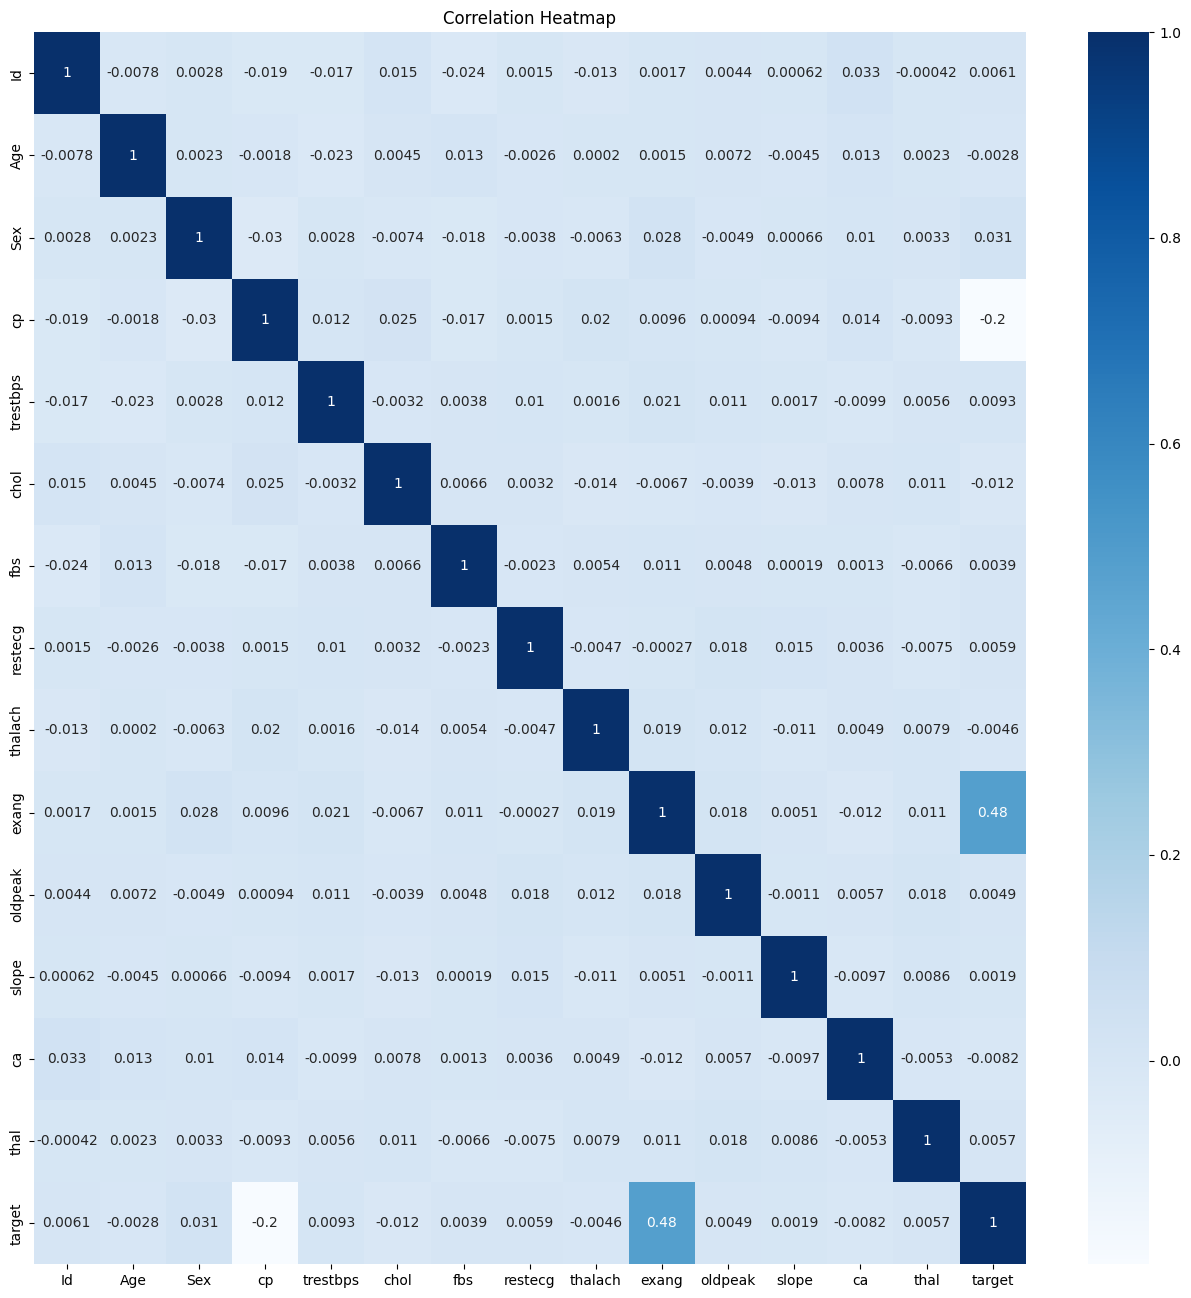

In [7]:
# 4. Exploratory Data Analysis (EDA)
plt.figure(figsize=(16, 16))
sns.heatmap(train_df.corr(), annot=True, cmap='Blues', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

In [8]:
# Correlation with target variable
print(train_df.corr()['target'].sort_values(ascending=False))

target      1.000000
exang       0.481897
Sex         0.030608
trestbps    0.009320
Id          0.006148
restecg     0.005911
thal        0.005709
oldpeak     0.004899
fbs         0.003925
slope       0.001909
Age        -0.002846
thalach    -0.004634
ca         -0.008244
chol       -0.012291
cp         -0.198082
Name: target, dtype: float64


In [9]:
# Boxplots to visualize distribution
def plot_boxplot(column, title):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=column, data=train_df)
    plt.title(title)
    plt.show()

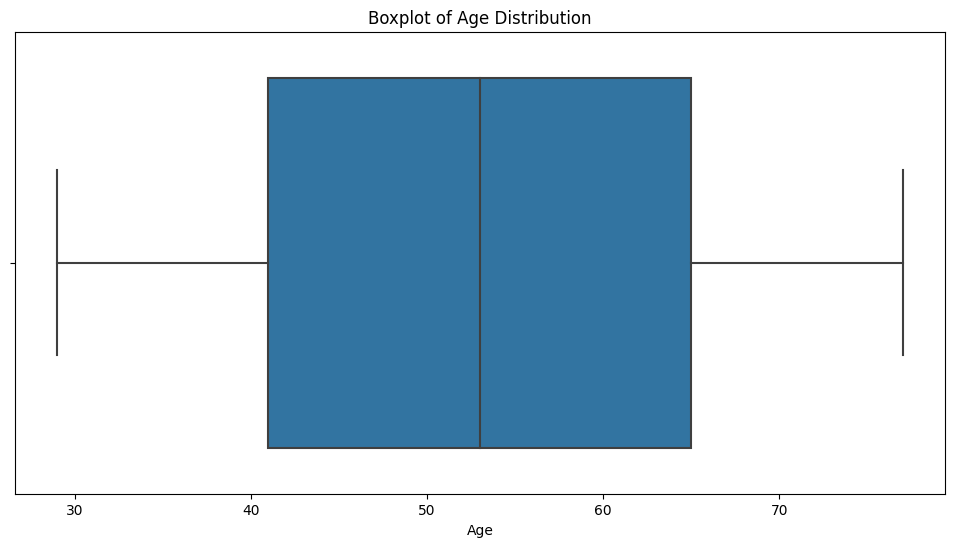

In [10]:
plot_boxplot('Age', 'Boxplot of Age Distribution')

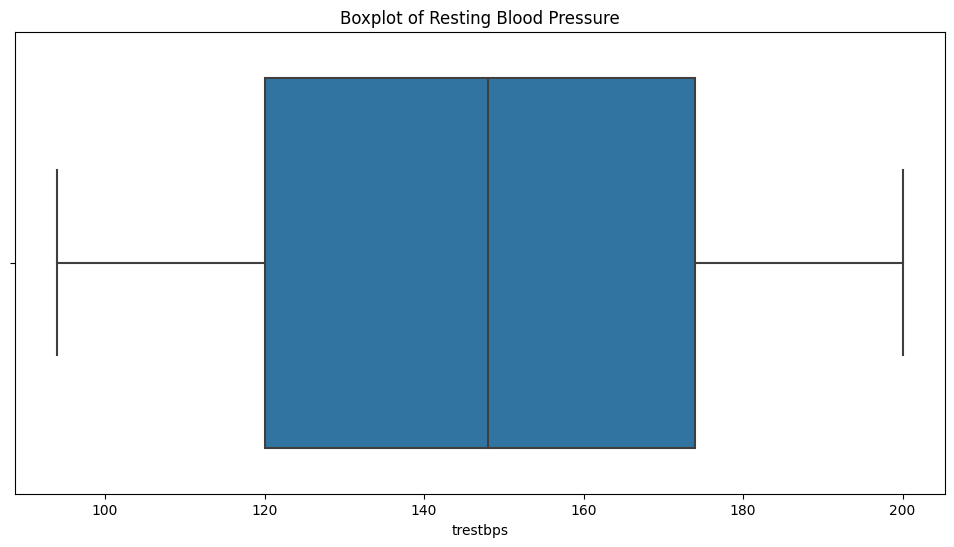

In [11]:
plot_boxplot('trestbps', 'Boxplot of Resting Blood Pressure')

In [12]:
# 5. Feature and Target Definition
X = train_df.drop(columns=['target'])
y = train_df['target']

In [13]:
# 6. Data Splitting
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# 7. Model Training and Evaluation: RandomForest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:
y_pred_val = rf_model.predict(X_val)
print("RandomForest Validation Accuracy:", accuracy_score(y_val, y_pred_val))
print(classification_report(y_val, y_pred_val))

RandomForest Validation Accuracy: 0.8275154004106776
              precision    recall  f1-score   support

           0       0.52      0.42      0.46       260
           1       0.88      0.92      0.90      1201

    accuracy                           0.83      1461
   macro avg       0.70      0.67      0.68      1461
weighted avg       0.82      0.83      0.82      1461



In [16]:
# 8. Cross-Validation for RandomForest
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
print("RandomForest Cross-Validation Scores:", cv_scores)
print("Average Cross-Validation Accuracy:", cv_scores.mean())

RandomForest Cross-Validation Scores: [0.81451061 0.81040383 0.816564   0.81232877 0.80616438]
Average Cross-Validation Accuracy: 0.8119943180219966


In [17]:
# 9. Hyperparameter Tuning for RandomForest using RandomizedSearchCV
param_grid_rf = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, 40, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt'],
    'bootstrap': [True, False]
}

random_search_rf = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid_rf,
                                      n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)
random_search_rf.fit(X_train, y_train)

# Best parameters and evaluation
best_rf = random_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_val)
print(f"Tuned RandomForest Accuracy: {accuracy_score(y_val, y_pred_rf)}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   3.6s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   5.6s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   2.6s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   2.6s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimato

In [18]:
# 10. Feature Importance using Recursive Feature Elimination (RFE)
rfe_selector = RFE(estimator=best_rf, n_features_to_select=8)
rfe_selector.fit(X_train, y_train)

RFE(estimator=RandomForestClassifier(max_depth=10, min_samples_leaf=2,
                                     min_samples_split=10, random_state=42),
    n_features_to_select=8)

In [19]:
# Retraining with selected features
X_train_rfe = X_train.iloc[:, rfe_selector.support_]
X_val_rfe = X_val.iloc[:, rfe_selector.support_]

rf_rfe_model = RandomForestClassifier(**random_search_rf.best_params_, random_state=42)
rf_rfe_model.fit(X_train_rfe, y_train)

y_pred_rfe = rf_rfe_model.predict(X_val_rfe)
print(f"RFE Feature Selection Accuracy: {accuracy_score(y_val, y_pred_rfe)}")

RFE Feature Selection Accuracy: 0.8186173853524983


In [20]:
# 11. Model Stacking: Combining RandomForest and XGBoost
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

stacking_model = StackingClassifier(
    estimators=[('rf', rf_rfe_model), ('xgb', xgb_model)],
    final_estimator=LogisticRegression(),
    passthrough=False
)

stacking_model.fit(X_train, y_train)
y_pred_stack = stacking_model.predict(X_val)
print(f"Stacked Model Accuracy: {accuracy_score(y_val, y_pred_stack)}")

Stacked Model Accuracy: 0.8042436687200547


In [23]:
# Rename columns in test_data to match training data
test_df = test_df.rename(columns={
    'age': 'Age',
    'sex': 'Sex',
    'id': 'Id'
})

In [24]:
# 12. Final Model Selection and Prediction
final_model = stacking_model
final_model.fit(X, y)
test_predictions = final_model.predict(test_df)

In [25]:
# 13. Submission File Preparation
submission = pd.DataFrame({
    'id': test_df['Id'],
    'target': test_predictions
})

submission.to_csv('submission_last.csv', index=False)

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   2.3s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   2.3s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   3.8s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   4.3s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   1.5s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   1.5s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   4.3s
[CV] END bootstrap=True, max_depth=20, max_fea